# Project - Google Analytics Customer Revenue Preprocessing

## Presenting the initial data: 

<b>Data Fields: </b>

<b>fullVisitorIdv</b> - A unique identifier for each user of the Google Merchandise Store. <br>
<b>channelGrouping</b> - The channel via which the user came to the Store.<br>
<b>date</b> - The date on which the user visited the Store.<br>
<b>device </b>- The specifications for the device used to access the Store.<br>
<b>geoNetwork</b> - This section contains information about the geography of the user.<br>
<b>sessionId</b> - A unique identifier for this visit to the store.<br>
<b>socialEngagementType</b> - Engagement type, either "Socially Engaged" or "Not Socially Engaged".<br>
<b>totals</b> - This section contains aggregate values across the session.<br>
<b>trafficSource</b> - This section contains information about the Traffic Source from which the session originated.<br>
<b>visitId</b> - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.<br>
<b>visitNumber</b> - The session number for this user. If this is the first session, then this is set to 1.<br>
<b>visitStartTime</b> - The timestamp (expressed as POSIX time).<br>

# Objectives: 

The main objectives of this project are :

* Load the data so everything is in tabular format (some columns contain JSON so it you will need to find ways to separate those into independent columns)
* Identify the variables that need special processing (removing or infering missing values, removing columns that don't contain useful information)
* Run visualizations to better understand the data

tip : the ```pd.read_csv``` function has some very useful arguments that will help you read the data properly. Use the ```converters``` argument along with the ```json.loads``` function in order to read the json columns , ```dtype``` enables you to set the type of specific columns, you may also use the ```skiprows``` argument in order to load a fraction of the dataset for faster subsequent processing.

## Importing necessary libraries

In [1]:
# Necessary to read the dataset from s3
!pip install s3fs

In [2]:
# Necessary librarys
import os # it's a operational system library, to set some informations
import random # random is to generate random values

import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix

import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots

import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

# to set a style to all graphs
plt.style.use('fivethirtyeight')
#init_notebook_mode(connected=True)

## Some columns are in Json format so it will be necessary to handle them.

In [3]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
#p = 1 # *** In this case we will use 50% of data set *** #

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = df
    p = 0.07
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and random.random() > p)# Number of rows that will be imported randomly
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df # returning the df after importing and transforming

# Importing the datasets

In [4]:
%%time 
# %%time is used to calculate the timing of code chunk execution #

# We will import the data using the name and extension that will be concatenated with dir_path
df = json_read("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/preprocessing_linear_models/Google_dataset.csv")  

<ipython-input-3-dac17ac9c2d2>:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  column_as_df = json_normalize(df[column])


Loaded Google_dataset.csv. Shape: (63270, 54)
CPU times: user 22.1 s, sys: 3.02 s, total: 25.1 s
Wall time: 1min 1s


In [5]:
# This command shows the first 5 rows of our dataset
pd.set_option('display.max_columns', 500)

df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,google + online,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,2938943183656635653,2938943183656635653_1472807194,Not Socially Engaged,1472807194,1,1472807194,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Italy,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,fastwebnet.it,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,3531015320757710684,3531015320757710684_1472868337,Not Socially Engaged,1472868337,1,1472868337,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset

## Knowing the missing values

In [6]:
def missing_values(data):
    null_values = ((100*data.isnull().sum()/len(data)).sort_values(ascending=False))
    return null_values[null_values > 0]

In [7]:
# calling the missing values function
missing_values(df) 

totals.transactionRevenue                       98.715031
trafficSource.adContent                         98.675518
trafficSource.adwordsClickInfo.adNetworkType    97.589695
trafficSource.adwordsClickInfo.slot             97.589695
trafficSource.adwordsClickInfo.page             97.589695
trafficSource.adwordsClickInfo.isVideoAd        97.589695
trafficSource.adwordsClickInfo.gclId            97.573890
trafficSource.isTrueDirect                      69.706022
trafficSource.referralPath                      63.404457
trafficSource.keyword                           55.542911
totals.bounces                                  50.518413
totals.newVisits                                22.159001
totals.pageviews                                 0.009483
dtype: float64

## Let's take a look on datatypes of all columns

In [8]:
print(df.info())

print("\n \n The distribution of columns across types is the following : \n {}".format(df.dtypes.value_counts()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63270 entries, 0 to 63269
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   channelGrouping                                    63270 non-null  object
 1   date                                               63270 non-null  int64 
 2   fullVisitorId                                      63270 non-null  object
 3   sessionId                                          63270 non-null  object
 4   socialEngagementType                               63270 non-null  object
 5   visitId                                            63270 non-null  int64 
 6   visitNumber                                        63270 non-null  int64 
 7   visitStartTime                                     63270 non-null  int64 
 8   device.browser                                     63270 non-null  object
 9   device.browserVer

## Creating the function to handle with date 

In [9]:
# library of datetime
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    df["_weekday"] = df["date"].dt.weekday
    df["_day"] = df["date"].dt.day
    df["_month"] = df["date"].dt.month
    df["_year"] = df["date"].dt.year
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    return df #returning the df after the transformations

In [10]:
df_train = date_process(df.copy()) #calling the function that we created above

df_train.head(n=2) #printing the first 2 rows of our dataset

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.referralPath,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,9,2016,15
1,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,google + online,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,9,2016,5


### Let's investigate some constant columns

In [11]:
# We will takeoff all columns where we have a unique value (constants)
# It is useful because this columns don't give us none information
constant_column = [col for col in df_train.columns if len(df_train[col].value_counts()) == 1]
df_train.drop(constant_column, axis=1, inplace=True)

# printing the total of columns dropped and the name of columns 
print("Columns with just one value: ", len(constant_column), "columns \n")
print("Name of constant columns: \n")
for col in constant_column:
    print(col)

Columns with just one value:  24 columns 

Name of constant columns: 

socialEngagementType
device.browserVersion
device.browserSize
device.operatingSystemVersion
device.mobileDeviceBranding
device.mobileDeviceModel
device.mobileInputSelector
device.mobileDeviceInfo
device.mobileDeviceMarketingName
device.flashVersion
device.language
device.screenColors
device.screenResolution
geoNetwork.cityId
geoNetwork.latitude
geoNetwork.longitude
geoNetwork.networkLocation
totals.visits
totals.bounces
totals.newVisits
trafficSource.adwordsClickInfo.criteriaParameters
trafficSource.isTrueDirect
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.isVideoAd


### Let's take a look at all columns in the dataset to see how many unique values and what these values are in order to filter out unimportant variables

In [12]:
# setting the function to show 
def knowningData(df, limit=3): #seting the function with df, 
    for col in df.columns:
        uniques = df[col].unique().tolist()
        print(f"______________________________________________\n"
              f"Name of column {col} :\n Uniques: {uniques[0:limit]}\n | Total nulls: {df[col].isnull().sum()} | "
              f"Total unique values: {len(uniques)}\n"
              f"_______________________________________________")

In [13]:
# calling our function: object is default
knowningData(df_train)

______________________________________________
Name of column channelGrouping :
 Uniques: ['Organic Search', 'Referral', 'Affiliates']
 | Total nulls: 0 | Total unique values: 8
_______________________________________________
______________________________________________
Name of column date :
 Uniques: [1472774400000000000, 1485388800000000000, 1498176000000000000]
 | Total nulls: 0 | Total unique values: 366
_______________________________________________
______________________________________________
Name of column fullVisitorId :
 Uniques: ['1131660440785968503', '4763447161404445595', '2938943183656635653']
 | Total nulls: 0 | Total unique values: 60780
_______________________________________________
______________________________________________
Name of column sessionId :
 Uniques: ['1131660440785968503_1472830385', '4763447161404445595_1472881213', '2938943183656635653_1472807194']
 | Total nulls: 0 | Total unique values: 63265
_______________________________________________
___

## I will drop some of this features and fillna or missing in some of them

In [14]:
to_drop = [ 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.campaign',
           'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot',
           'trafficSource.adContent', 'trafficSource.keyword']

In [15]:
df_train.drop(to_drop, axis=1, inplace=True)

In [16]:
print("Total features dropped: ", len(to_drop))
print("Shape after dropping: ", df_train.shape)

Total features dropped:  7
Shape after dropping:  (63270, 28)


## Deal with missing values

In [17]:
display(df_train.head())

def NumericalColumns(df):    # fillna numeric feature
    numeric_features = ['totals.pageviews', "totals.transactionRevenue", "totals.hits"]
    df[numeric_features] = df[numeric_features].astype(float)
    df["totals.transactionRevenue"].fillna(0.0, inplace=True)
    df['totals.pageviews'].fillna(1.0, inplace=True)
    return df #return the transformed dataframe

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.source,trafficSource.medium,_weekday,_day,_month,_year,_visitHour
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,NaN,google,organic,4,2,9,2016,15
1,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,Linux,False,desktop,Asia,Southeast Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,NaN,google,organic,4,2,9,2016,5
2,Organic Search,2016-09-02,2938943183656635653,2938943183656635653_1472807194,1472807194,1,1472807194,Chrome,Windows,False,desktop,Europe,Southern Europe,Italy,not available in demo dataset,not available in demo dataset,not available in demo dataset,fastwebnet.it,1,1,NaN,google,organic,4,2,9,2016,9
3,Organic Search,2016-09-02,3531015320757710684,3531015320757710684_1472868337,1472868337,1,1472868337,Chrome,Linux,False,desktop,Americas,South America,Brazil,not available in demo dataset,not available in demo dataset,not available in demo dataset,cabotelecom.com.br,1,1,NaN,google,organic,4,2,9,2016,2
4,Organic Search,2016-09-02,542217492398994444,542217492398994444_1472822034,1472822034,1,1472822034,Chrome,Macintosh,False,desktop,Europe,Western Europe,Belgium,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobistar.be,1,1,NaN,google,organic,4,2,9,2016,13


In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def Normalizing(df):
    num_col = df.select_dtypes(include=np.number)
    scaler = MinMaxScaler()
    df[num_col.columns] = scaler.fit_transform(num_col)
    return df

In [19]:
# call the function to transform the numerical columns
df_train = NumericalColumns(df_train)

# Call the function that will normalize some features
df_train = Normalizing(df_train)

### Based on this output I will select and set a variable with all features by category

In [20]:
dummy_feaures =['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 
                'geoNetwork.subContinent']


numericals = ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

# Visualizations
### Revenue
First, let see the distribuition of transactions Revenues

count    813.000000
mean       0.048287
std        0.092114
min        0.000285
25%        0.008986
50%        0.018321
75%        0.040955
max        1.000000
Name: totals.transactionRevenue, dtype: float64

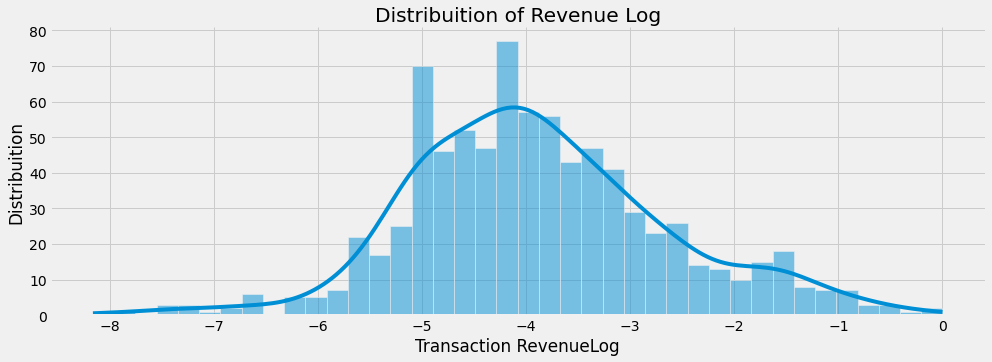

In [21]:
transaction_revenue = df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"]
display(transaction_revenue.describe())

ax = sns.displot(np.log(transaction_revenue), bins=40, kde=True, height=5, aspect=2.8)
ax.set(xlabel='Transaction RevenueLog', ylabel='Distribuition', title='Distribuition of Revenue Log')
plt.show()

In [22]:
df_train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.operatingSystem', 'device.isMobile', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.source',
       'trafficSource.medium', '_weekday', '_day', '_month', '_year',
       '_visitHour'],
      dtype='object')

### Device Browsers

Chrome               43435
Safari               12742
Firefox               2578
Internet Explorer     1420
Edge                   729
Android Webview        528
Safari (in-app)        477
Opera Mini             414
Opera                  392
UC Browser             186
Name: device.browser, dtype: int64

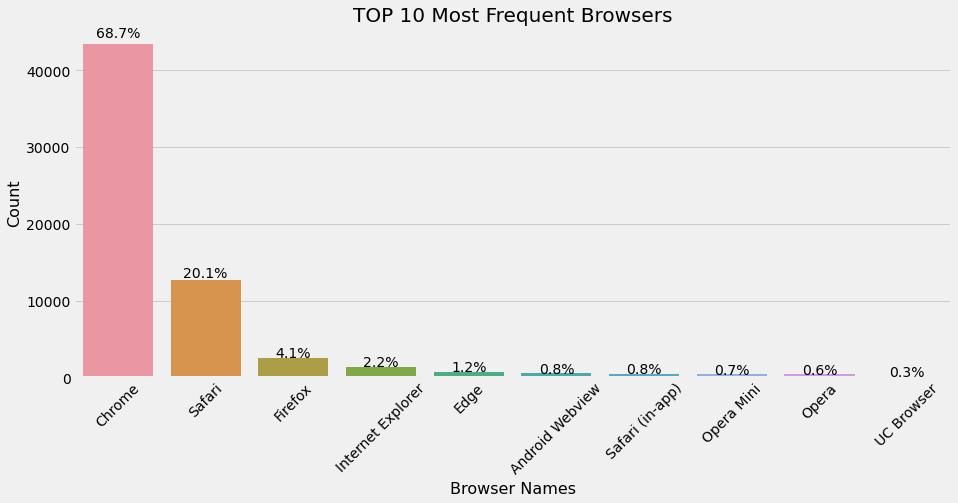

In [24]:
numbered_displayed = 10
top_browsers = df_train['device.browser'].value_counts()[:numbered_displayed]

display(top_browsers)

# seting the graph size
fig, ax = plt.subplots(1,1,figsize=(14,6))

# Let explore the browser used by users
ax = sns.barplot(x=top_browsers.index, y=top_browsers)

total = len(df_train['device.browser'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{(height/total)*100:.1f}%', (x + p.get_width()/2, y + p.get_height()*1.02), ha='center')
        
plt.title(f"TOP {numbered_displayed} Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.show()

## What if we cross the Revenue and Browser?


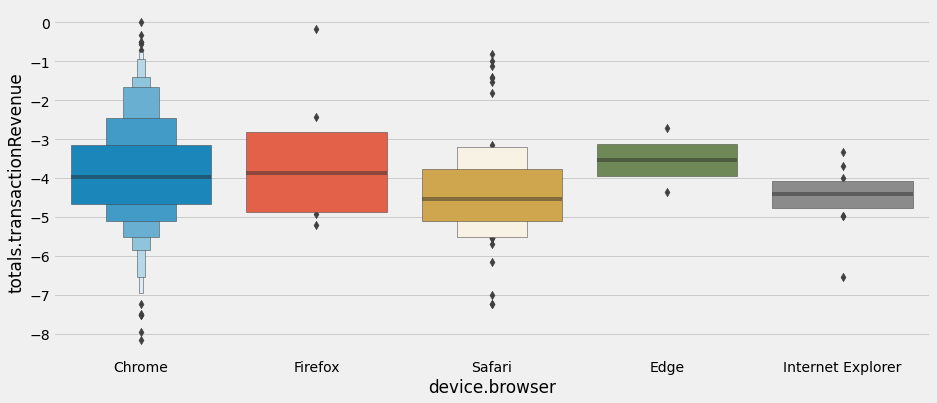

In [25]:
# seting the graph size
fig, ax = plt.subplots(1,1,figsize=(14,6))
boxplot = df_train[df_train['totals.transactionRevenue'] > 0].copy()
boxplot.loc[:, 'totals.transactionRevenue'] = np.log(boxplot['totals.transactionRevenue'])
sns.boxenplot(data=boxplot, x='device.browser', y='totals.transactionRevenue')
plt.show()

## Visualization by acquisition channel

Organic Search    26730
Social            15870
Direct             9968
Referral           7284
Paid Search        1833
Affiliates         1109
Display             466
(Other)              10
Name: channelGrouping, dtype: int64

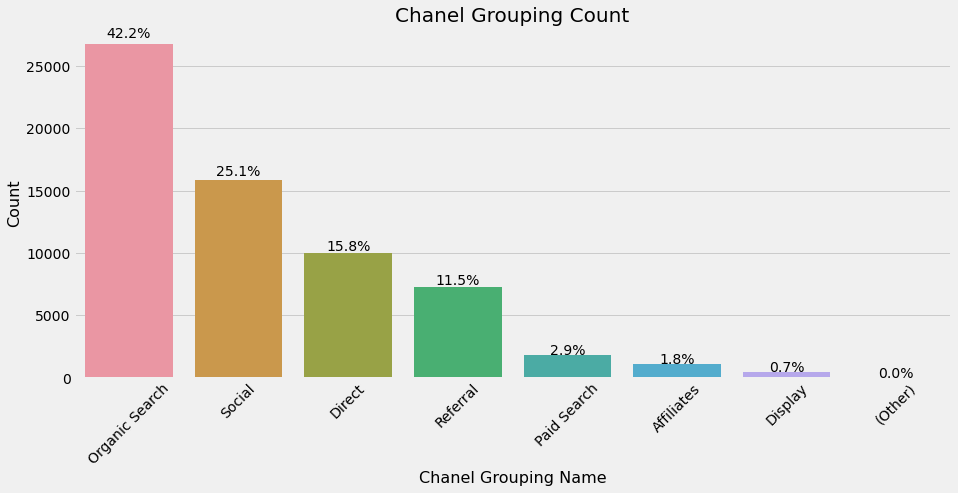

In [26]:
# the top of browsers represent % of total
top_channel = df_train['channelGrouping'].value_counts()
display(top_channel)

# seting the graph size
fig, ax = plt.subplots(1,1,figsize=(14,6))

# Let explore the browser used by users
ax = sns.barplot(x=top_channel.index, y=top_channel)

total = len(df_train['channelGrouping'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{(height/total)*100:.1f}%', (x + p.get_width()/2, y + p.get_height()*1.02), ha='center')
        
plt.title(f"Chanel Grouping Count", fontsize=20) # Adding Title and seting the size
plt.xlabel("Chanel Grouping Name", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.show()

## Crossing Channel Grouping x Browsers

In [27]:
def stacked_plot(datas, stacked_datas, x_label, title, rotation_xlabels=45, top_datas="all", top_stacked_datas="all", color_palette="Paired"):
    fig, ax = plt.subplots(1,1,figsize=(14,6))

    # sort datas by count
    datas_counts = df_train[datas].value_counts()
    datas_counts = datas_counts[:top_datas if top_datas!= "all" else len(datas_counts)]
    
    # sort stacked datas by count
    stacked_datas_counts = df_train[stacked_datas].value_counts()
    stacked_datas_counts = stacked_datas_counts[:top_stacked_datas if top_stacked_datas!= "all" else len(stacked_datas_counts)].index
    
    # map datas with attributed colors
    color_map = dict(zip(stacked_datas_counts, sns.color_palette(color_palette, n_colors=len(stacked_datas_counts))))
    
    # plot all bars
    for idx, val in enumerate(datas_counts.index):
        bottom=0
        test = df_train.loc[(df_train[datas] == val) & (df_train[stacked_datas].isin(stacked_datas_counts)), stacked_datas].value_counts()
        for index in test.index:
            ax.bar(idx, test[index], width=0.8, bottom=bottom, label=index, color=color_map[index])
            bottom += test[index] 
    
    # display colors legend
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(dict(zip(labels, handles)))
    
    # display x title
    plt.xticks(range(len(datas_counts)), datas_counts.index, fontsize=16)
    plt.xlabel(x_label, fontsize=18) # seting the x label size
    plt.xticks(rotation=rotation_xlabels) # Adjust the xticks, rotating the labels
    
    # seting the y label size
    plt.ylabel("Count", fontsize=18)
    
    plt.title(title, fontsize=20)
    plt.show()

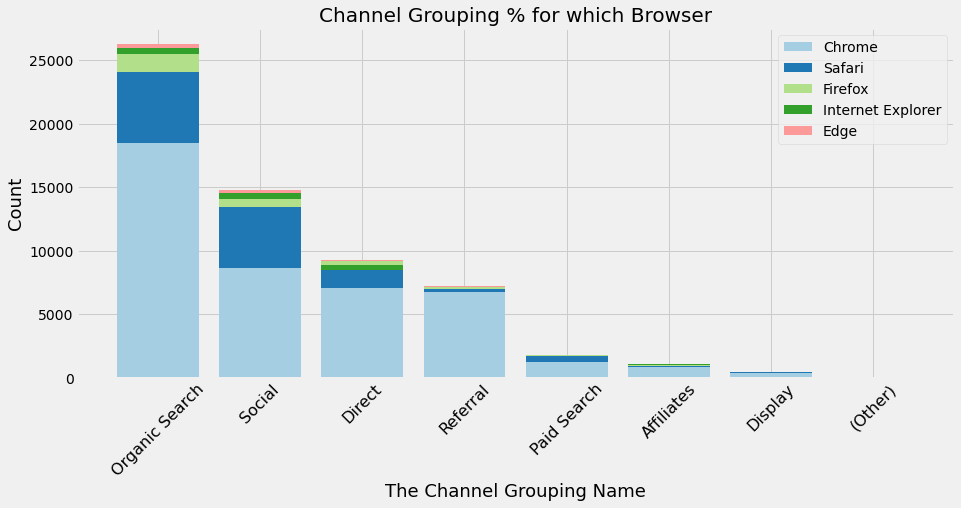

In [28]:
stacked_plot("channelGrouping", 'device.browser', "The Channel Grouping Name", "Channel Grouping % for which Browser", top_stacked_datas=5)

Very cool! Interesting patterns

# Operational System 

Windows          24667
Macintosh        17677
Android           8624
iOS               7556
Linux             2394
Chrome OS         1888
(not set)          335
Windows Phone       79
Name: device.operatingSystem, dtype: int64

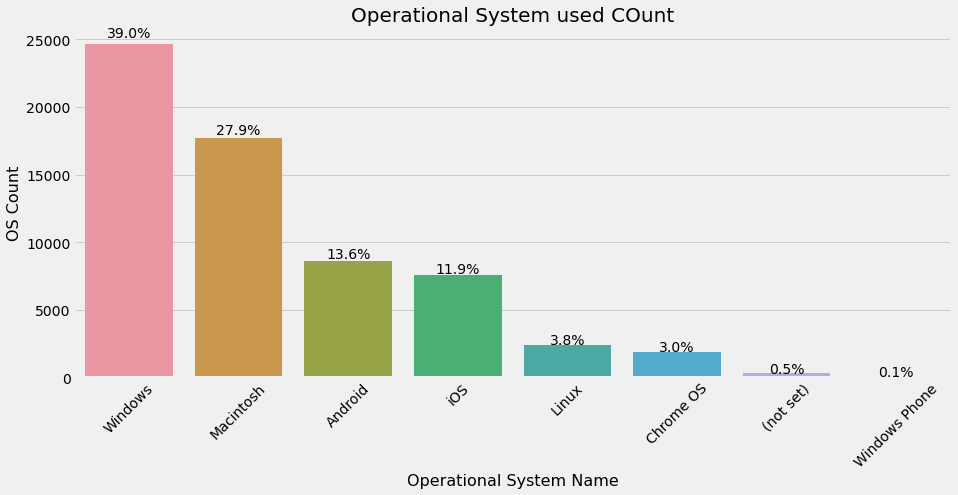

In [29]:
# the top of browsers represent % of total
numbered_displayed = 8
top_system = df_train['device.operatingSystem'].value_counts()[:numbered_displayed]
display(top_system)

# seting the graph size
fig, ax = plt.subplots(1,1,figsize=(14,6))

# Let explore the browser used by users
ax = sns.barplot(x=top_system.index, y=top_system)

total = len(df_train['device.operatingSystem'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{(height/total)*100:.1f}%', (x + p.get_width()/2, y + p.get_height()*1.02), ha='center')
        
plt.title(f"Operational System used COunt", fontsize=20) # Adding Title and seting the size
plt.xlabel("Operational System Name", fontsize=16) # Adding x label and seting the size
plt.ylabel("OS Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.show()

## Now let's investigate the most used brower by Operational System

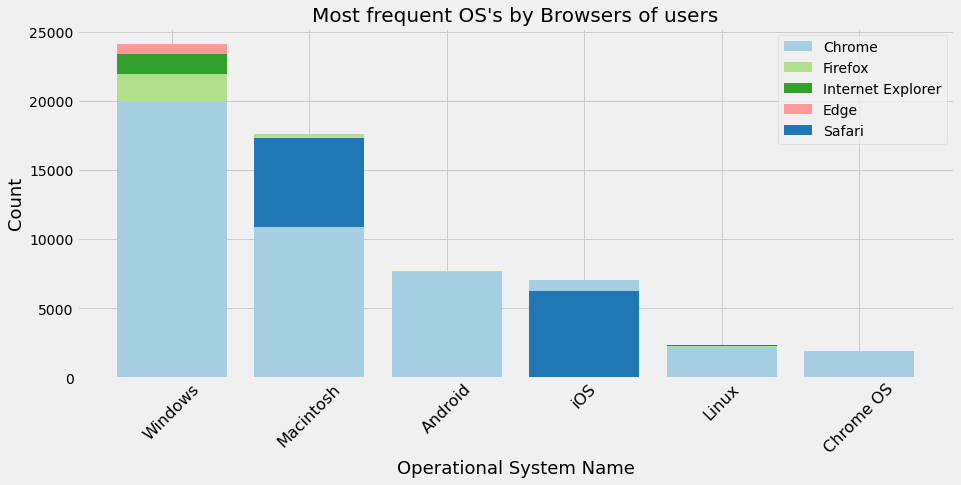

In [30]:
# Ploting the crosstab that we did above
stacked_plot('device.operatingSystem', 'device.browser', "Operational System Name", "Most frequent OS's by Browsers of users", 
             top_datas=6, top_stacked_datas=5)

## I will explore the distribuition of transaction Revenue by each OS

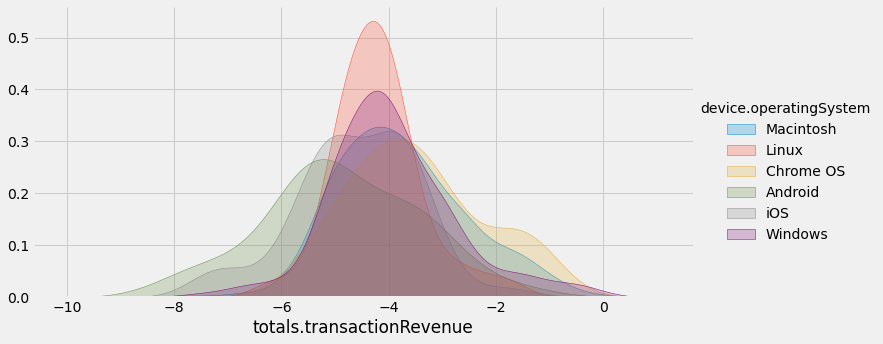

In [31]:
sns.FacetGrid(boxplot.loc[boxplot['device.operatingSystem'].isin(top_system.index), :], hue='device.operatingSystem', 
              height=5, aspect=2).map(sns.kdeplot, 'totals.transactionRevenue', shade=True).add_legend()

Cool, we can have a better understanding of the distribution of Revenue by OS

## Let's investigate the Device Category

desktop    46564
mobile     14592
tablet      2114
Name: device.deviceCategory, dtype: int64

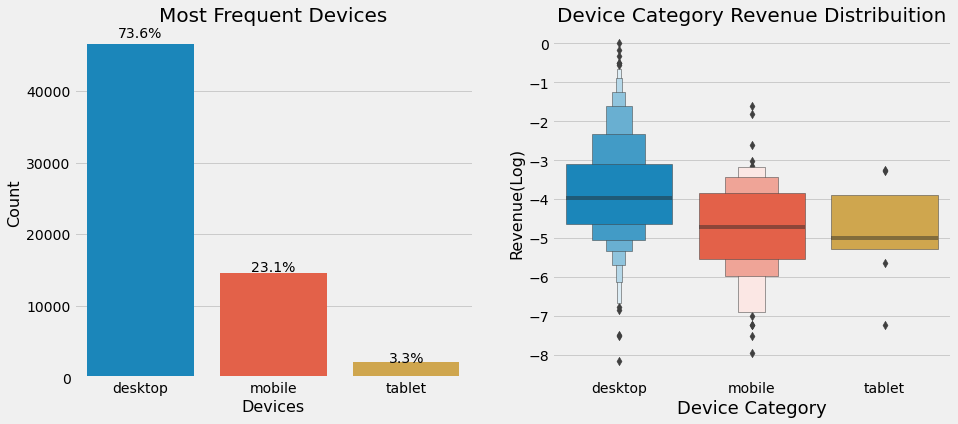

In [32]:
top_devices = df_train['device.deviceCategory'].value_counts()

display(top_devices)

# seting the graph size
fig, axes = plt.subplots(1,2,figsize=(14,6))

# Let explore the browser used by users
ax = sns.barplot(x=top_devices.index, y=top_devices, ax = axes[0])

total = len(df_train['device.deviceCategory'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{(height/total)*100:.1f}%', (x + p.get_width()/2, y + p.get_height()*1.02), ha='center')
        
ax.set_title(f"Most Frequent Devices", fontsize=20)
ax.set_xlabel("Devices", fontsize=16)
ax.set_ylabel("Count", fontsize=16)

ax = sns.boxenplot(data=boxplot, x='device.deviceCategory', y='totals.transactionRevenue', ax=axes[1])

ax.set_title("Device Category Revenue Distribuition", fontsize=20) # seting the title size
ax.set_xlabel("Device Category", fontsize=18) # seting the x label size
ax.set_ylabel("Revenue(Log)", fontsize=16) # seting the y label size
plt.show()

## Let's see the difference distribution between Devices

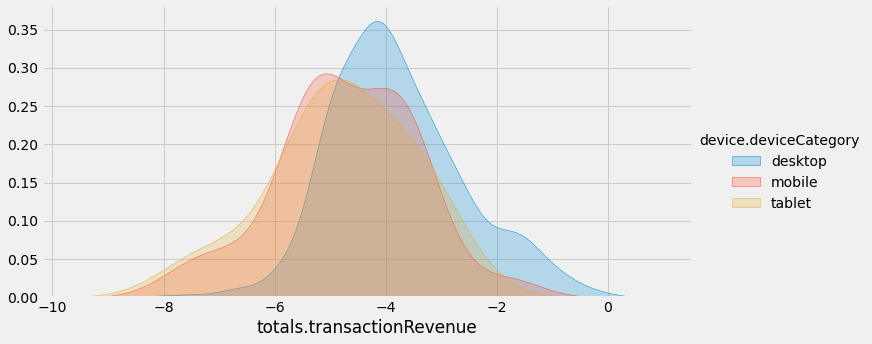

In [33]:
sns.FacetGrid(boxplot, hue='device.deviceCategory', height=5, aspect=2).map(
    sns.kdeplot, 
    'totals.transactionRevenue', 
    shade=True
).add_legend()
plt.show()

## Now, lets investigate the Device Category by Browsers

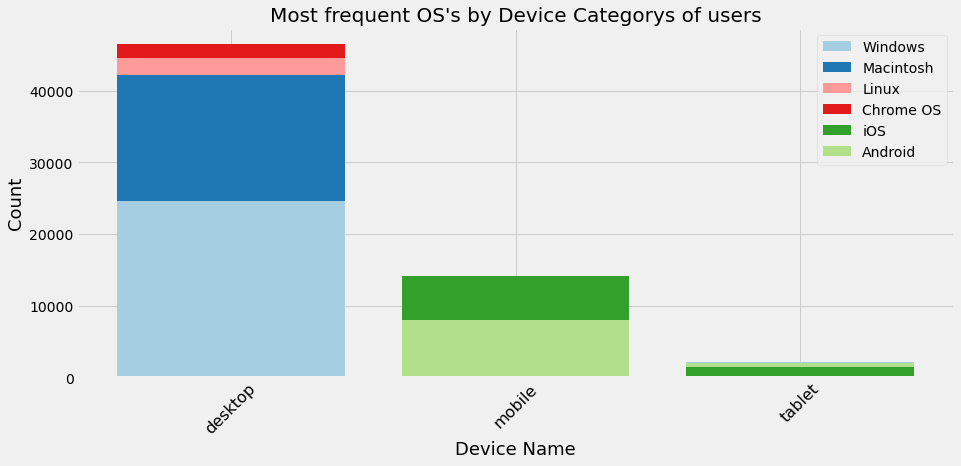

In [34]:
# Ploting the crosstab that we did above
stacked_plot('device.deviceCategory', 'device.operatingSystem', "Device Name", 
             "Most frequent OS's by Device Categorys of users", top_stacked_datas=6)

# SubContinent 

Northern America    27339
Southeast Asia       5414
Western Europe       4219
Southern Asia        4170
Northern Europe      4079
Eastern Asia         3304
Eastern Europe       3150
South America        2949
Western Asia         2694
Southern Europe      2390
Central America      1110
Australasia          1053
Northern Africa       526
Caribbean             186
Western Africa        170
Name: geoNetwork.subContinent, dtype: int64

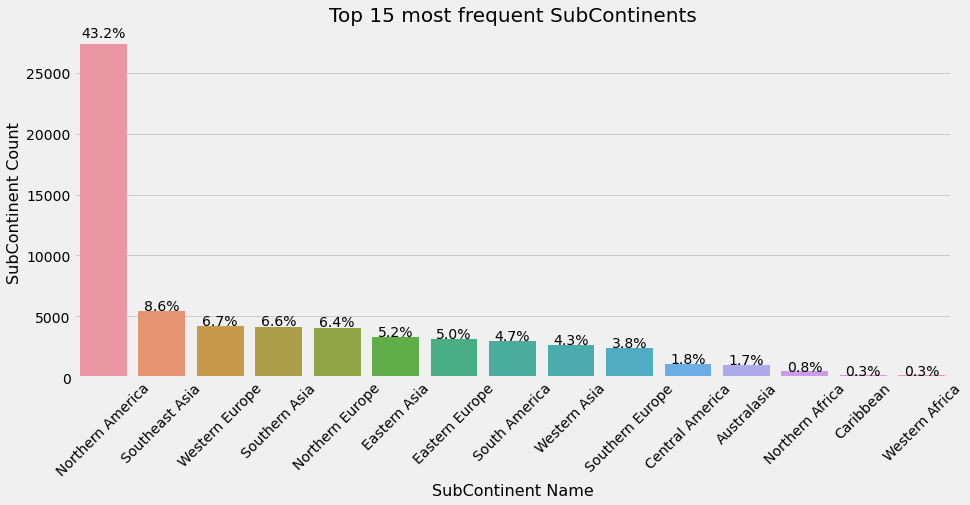

In [35]:
# the top of browsers represent % of total
numbered_displayed = 15
top_continent = df_train['geoNetwork.subContinent'].value_counts()[:numbered_displayed]
display(top_continent)

# seting the graph size
fig, ax = plt.subplots(1,1,figsize=(14,6))

# Let explore the browser used by users
ax = sns.barplot(x=top_continent.index, y=top_continent)

total = len(df_train['geoNetwork.subContinent'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{(height/total)*100:.1f}%', (x + p.get_width()/2, y + p.get_height()*1.02), ha='center')
        
plt.title(f"Top {numbered_displayed} most frequent SubContinents", fontsize=20) # Adding Title and seting the size
plt.xlabel("SubContinent Name", fontsize=16) # Adding x label and seting the size
plt.ylabel("SubContinent Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.show()

## Let's cross the SubContinent by Browser

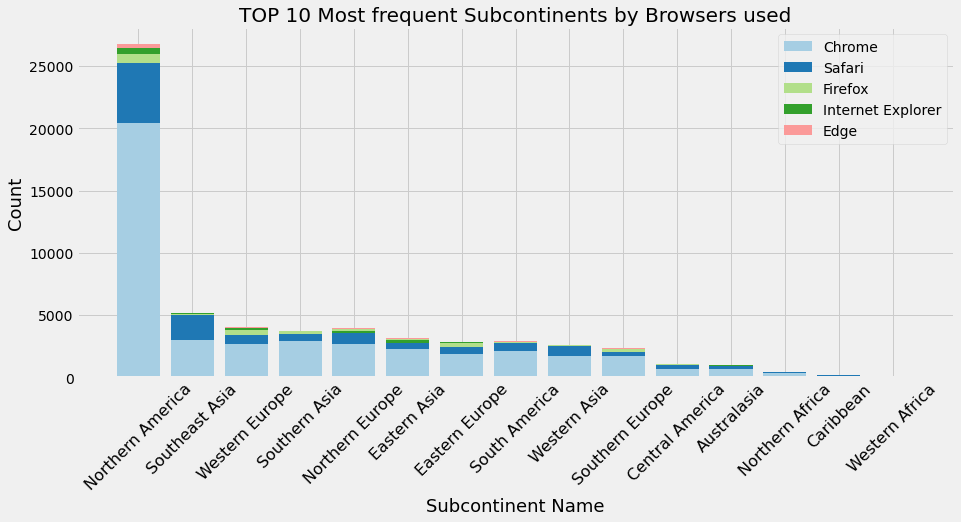

In [36]:
# Ploting the crosstab that we did above
stacked_plot('geoNetwork.subContinent', 'device.browser', "Subcontinent Name", "TOP 10 Most frequent Subcontinents by Browsers used", 
             top_datas=numbered_displayed, top_stacked_datas=5)